In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('all_seasons_working.csv')

In [35]:
# Is there a relationship between usg_pct spend and draft_number?

# changing 'draft number' column from object type to int type 
df.draft_number = pd.to_numeric(df.draft_number, errors='coerce').fillna(0).astype(np.int64)
# saving undrafted players in anorher dataframe
df_with_undrafted = df[df['draft_number'] == 0]
# dropping undrafted players from df
df_only_drafted_players = df.drop(index=df_with_undrafted.index)
# group by name
drafted_players_grouped = df_only_drafted_players.groupby('player_name').mean()

In [36]:
# separate into features and labels so we will create 2 matrixes
# features - remaining columns that are not your label column
X = drafted_players_grouped.drop('draft_number', axis=1)
print(X)
# label column
y = drafted_players_grouped['usg_pct']
print(y)

from sklearn.model_selection import train_test_split

# separates the features (x) and later labels (y) - do not change the order of unpacking
# test size - what percentage of data should go to the test set (around 30 percent)
# random_state - controls the shuffling of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

                      Unnamed: 0        age  player_height  player_weight  \
player_name                                                                 
A.C. Green           1114.400000  35.000000         205.74     102.058200   
A.J. Bramlett        1711.000000  23.000000         208.28     102.965384   
A.J. Guyton          2524.333333  24.000000         185.42      81.646560   
AJ Hammons           9404.000000  24.000000         213.36     117.933920   
AJ Price             7113.833333  25.500000         187.96      84.821704   
...                          ...        ...            ...            ...   
Zhaire Smith        10809.000000  20.500000         191.77      91.625584   
Zhou Qi             10338.000000  22.500000         215.90      95.254320   
Zion Williamson     11075.000000  19.500000         199.39     128.820128   
Zoran Planinic       3731.333333  22.000000         200.66      89.962413   
Zydrunas Ilgauskas   3742.384615  29.846154         220.98     117.933920   

In [37]:
X_test

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
player_name,,,,,,,,,,,,,,
James Robinson,1004.750000,27.750000,187.960000,81.646560,44.000000,5.900000,1.625000,1.375000,-5.625000,0.022750,0.118500,0.196000,0.484250,0.140250
LaSalle Thompson,93.000000,36.000000,208.280000,111.130040,26.000000,0.400000,1.300000,0.100000,-12.800000,0.062000,0.205000,0.098000,0.231000,0.024000
Randy Brown,1500.571429,32.000000,187.960000,86.376877,46.857143,4.200000,1.600000,2.442857,-6.614286,0.020857,0.075571,0.140571,0.375000,0.325857
Nenad Krstic,4998.428571,24.000000,213.360000,110.158057,59.857143,10.385714,5.442857,0.885714,0.014286,0.082000,0.170286,0.196857,0.527571,0.057714
Willy Hernangomez,10449.400000,25.000000,210.820000,110.676448,51.200000,6.900000,5.520000,1.000000,-2.300000,0.125200,0.248200,0.199800,0.584400,0.111000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Justin Patton,10716.750000,22.500000,212.090000,108.748682,5.500000,2.725000,1.700000,0.625000,-7.250000,0.038500,0.122500,0.165500,0.438750,0.111250
Keita Bates-Diop,10965.333333,24.000000,204.046667,103.872568,34.666667,4.700000,2.433333,0.566667,-7.800000,0.032000,0.138000,0.146667,0.515333,0.062000
Orlando Johnson,7922.666667,25.333333,195.580000,99.790240,34.333333,3.300000,1.833333,0.533333,-6.400000,0.033000,0.142667,0.166000,0.423667,0.084333


In [32]:
# help(train_test_split)

In [38]:
# creating an estimator within Sklearn
from sklearn.linear_model import LinearRegression

In [40]:
# read, look up to hyperparameters ( parameters to adjust for better performance)
# help(LinearRegression)

In [41]:
# first time use default and check default performance, after that change parameters/hyperparameters
# it creates and instance of linear regression model
# (model will 'learn' the beta coefficients for the best fitting line. 
# we did not tell the computer what those Beta coeffcient values were, it learned those through gradient descent)
model = LinearRegression()

In [42]:
# now this 'model' instance is waiting for data to be trained on
# we do it by calling fir method on model
model.fit(X_train,y_train)

LinearRegression()

In [74]:
# now we want to predict on test features and compare with y_test
test_predictions = model.predict(X_test)

# compare test predictions with y_test values (true values for X_test features)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# checking the mean value of usg_pct column 
mean_val = drafted_players_grouped['usg_pct'].mean()
print(mean_val)

# checking the mean absolute error
mean_abs_err = mean_absolute_error(y_test, test_predictions)
print(mean_abs_err)
# in comparison to avg value, mean absolute error is off by less than 1%

0.1841057750365237
6.861749199961728e-17


In [76]:
# checking the mean squared error
mean_sqr_err = mean_squared_error(y_test, test_predictions)
print(mean_sqr_err)

# to compare with mean_val we need to use sqrt func on mean_sqr_err
# checking the root mean squared error
root_mean_sqrt_err = np.sqrt(mean_sqr_err)
print(root_mean_sqrt_err)

8.046822166846107e-33
8.970408110474187e-17


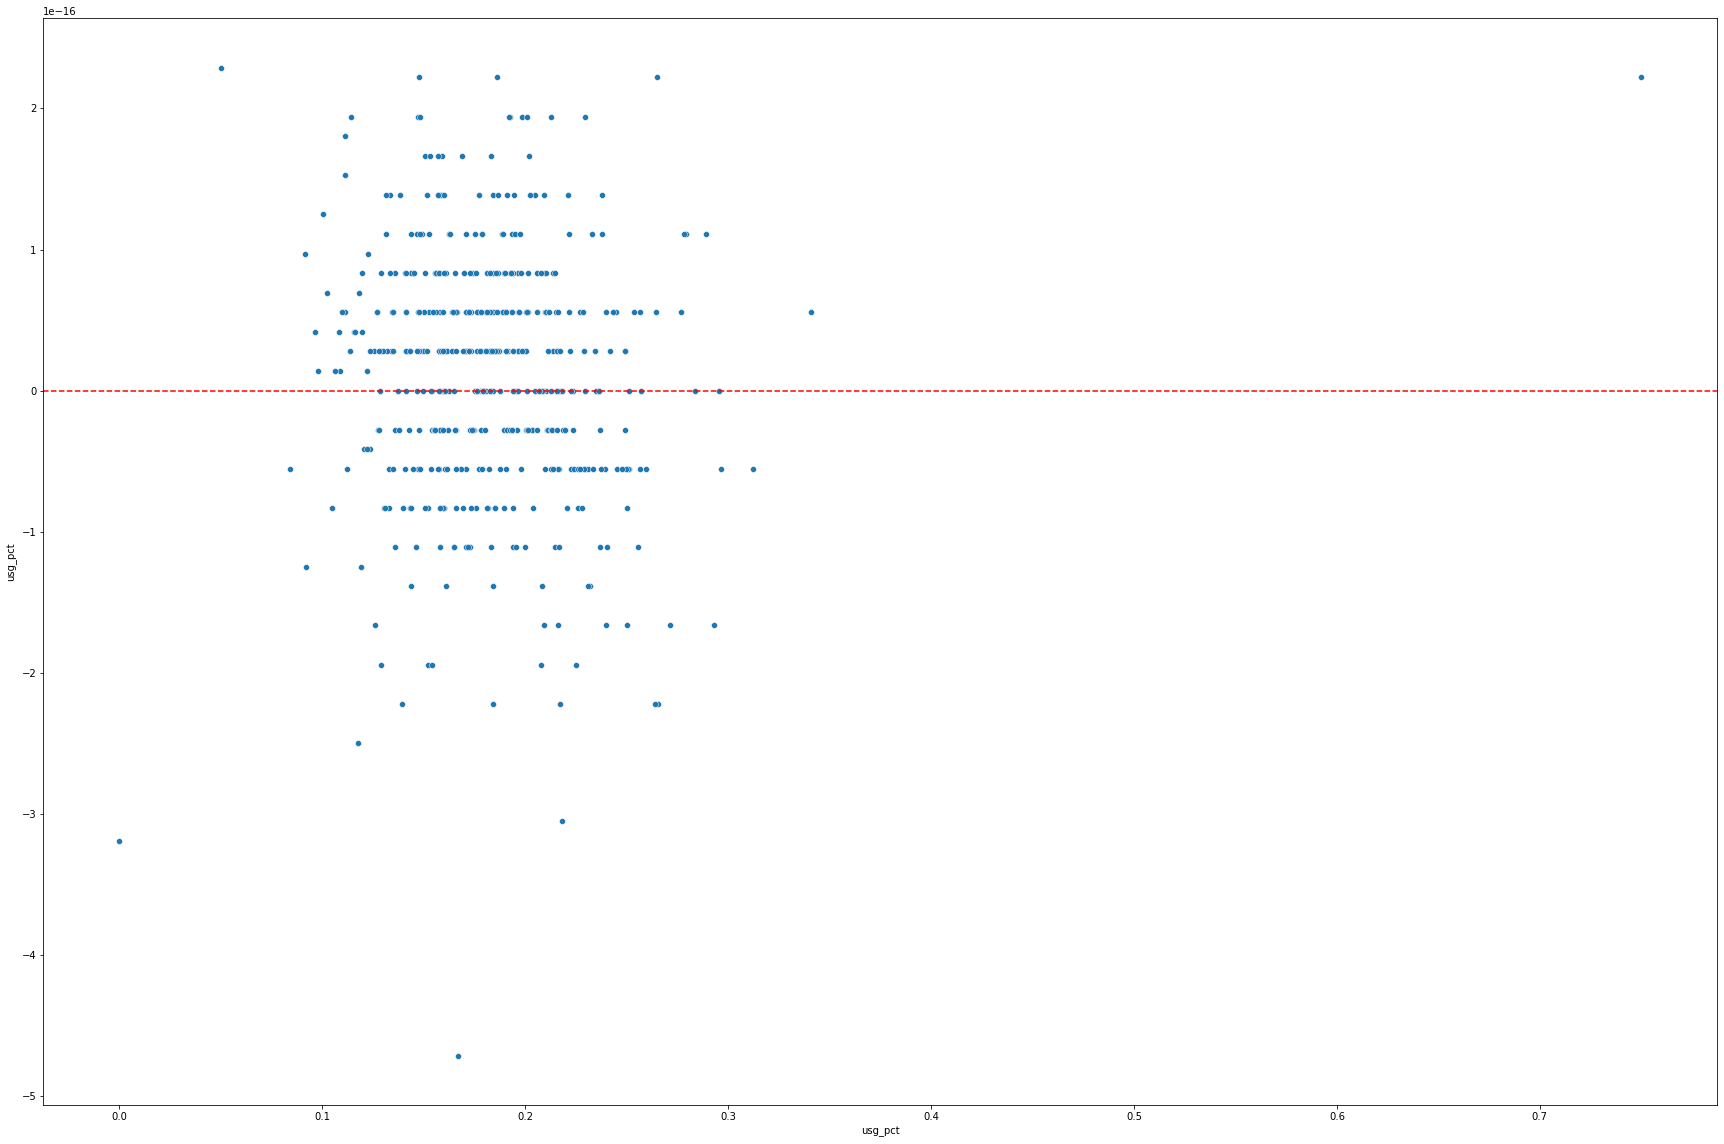

In [88]:
test_residuals = y_test - test_predictions
test_residuals
fig = plt.gcf()
fig.set_size_inches(30, 20)
# checking if using linear regression is fine, the data below should be distributed randomly
# if its not we should consider not using linear regression
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

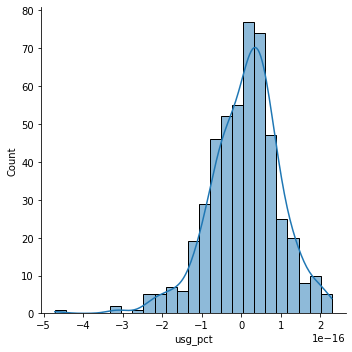

In [86]:
# check if distribution is normal
sns.displot(test_residuals, bins=25, kde=True)

In [ ]:
import scipy as sp